## Explorative Data Analysis

### Reading the data

In [26]:
# Load required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress



In [27]:


# Read in the data
df = pd.read_csv("../data/soilify_bihar_training_v2.csv")

# check column names
df.columns



Index(['OC', 'B11', 'B12', 'B2', 'B3', 'B4', 'B8', 'bai', 'bsi', 'evi', 'lai',
       'nbr', 'ndmi', 'ndvi', 'ndwi', 'savi', 'slope', 'LST_Day_1km',
       'elevation'],
      dtype='object')

In [28]:
# Print the first 5 rows of the DataFrame
df.head()

,OC,B11,B12,B2,B3,B4,B8,bai,bsi,evi,lai,nbr,ndmi,ndvi,ndwi,savi,slope,LST_Day_1km,elevation
0,0.5,0.34295,0.29280,0.10345,0.1284,0.1571,0.23960,28.155871,0.845041,0.146659,0.276196,-0.099925,-0.177410,0.207966,0.302174,0.138006,0.584573,15028.93802,65
1,0.5,0.21725,0.11935,0.08255,0.1097,0.0808,0.38110,9.664278,0.399940,0.602154,0.948150,0.523029,0.273836,0.650141,0.552975,0.468292,3.243201,15029.87919,61
2,0.5,0.32180,0.23630,0.09365,0.1135,0.1131,0.24680,28.517773,0.723246,0.273298,0.463384,0.021735,-0.131903,0.371492,0.369970,0.233225,0.831567,15030.76218,60
3,0.5,0.27010,0.19210,0.09410,0.1124,0.1230,0.23735,31.267565,0.733729,0.225169,0.396149,0.105367,-0.064538,0.317330,0.357255,0.199367,0.935632,15033.97166,56
4,0.5,0.22785,0.15960,0.08475,0.0999,0.0992,0.21465,41.810802,0.691516,0.245800,0.418598,0.147094,-0.029831,0.367851,0.364807,0.212785,2.774910,15034.07980,58


In [29]:
# Print the shape of the DataFrame
print("Shape:", df.shape)

Shape: (1580, 19)


In [30]:
# Print the data types of the columns
print(df.dtypes)

OC             float64
B11            float64
B12            float64
B2             float64
B3             float64
B4             float64
B8             float64
bai            float64
bsi            float64
evi            float64
lai            float64
nbr            float64
ndmi           float64
ndvi           float64
ndwi           float64
savi           float64
slope          float64
LST_Day_1km    float64
elevation        int64
dtype: object


In [31]:
# Print summary statistics for the columns
print(df.describe())


                OC          B11          B12           B2           B3  \
count  1580.000000  1580.000000  1580.000000  1580.000000  1580.000000   
mean      0.560854     0.225509     0.171007     0.096704     0.115419   
std       0.195851     0.051715     0.059744     0.022670     0.021357   
min       0.090000     0.034700     0.019700     0.038050     0.058600   
25%       0.430000     0.189062     0.129875     0.081800     0.101575   
50%       0.560000     0.227500     0.173200     0.094100     0.113600   
75%       0.680000     0.261738     0.213425     0.109875     0.129000   
max       1.920000     0.370900     0.350600     0.176400     0.209400   

                B4           B8          bai          bsi          evi  \
count  1580.000000  1580.000000  1580.000000  1580.000000  1580.000000   
mean      0.116577     0.228933    45.232730     0.714811     0.232057   
std       0.027433     0.044777    63.169054     0.148655     0.115450   
min       0.039000     0.067600     6

In [32]:
# Check for missing values
print("Missing Values:", df.isnull().sum().sum())


Missing Values: 0


In [37]:

#Define the dependent variable
dependent_var = "OC"

# Define the independent variables
independent_vars = list(df.drop(dependent_var, axis=1))
print(independent_vars)


['B11', 'B12', 'B2', 'B3', 'B4', 'B8', 'bai', 'bsi', 'evi', 'lai', 'nbr', 'ndmi', 'ndvi', 'ndwi', 'savi', 'slope', 'LST_Day_1km', 'elevation']


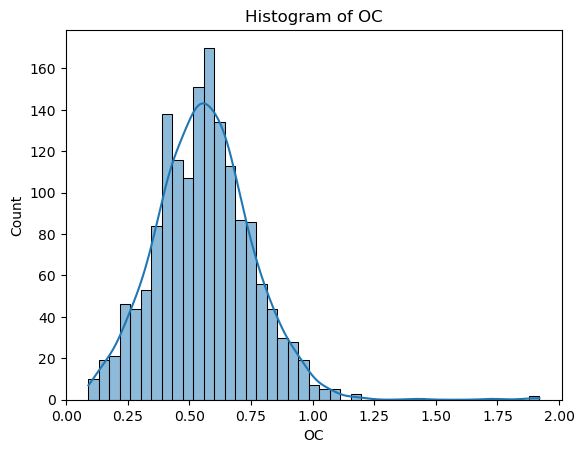

In [33]:
# Plot a histogram of the dependent variable
sns.histplot(df["OC"], kde=True)
plt.title("Histogram of OC")
plt.xlabel("OC")
plt.ylabel("Count")
plt.show()

Number of outliers removed: 0


<AxesSubplot:xlabel='OC', ylabel='Count'>

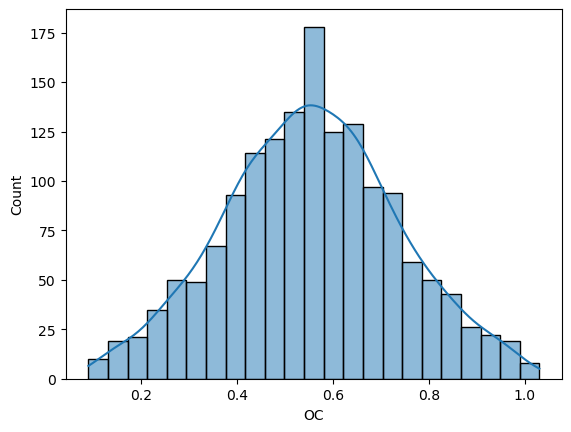

In [38]:

# remove outliers in OC

len_before = len(df)
# Calculate the IQR for the OC column
Q1 = df[dependent_var].quantile(0.25)
Q3 = df[dependent_var].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outlier removal
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove the outliers from the DataFrame
df = df[(df[dependent_var] >= lower_bound) & (df[dependent_var] <= upper_bound)]

len_after = len(df)

print("Number of outliers removed:", len_before - len_after)
#histogram after removing outliers
sns.histplot(df["OC"], kde=True)



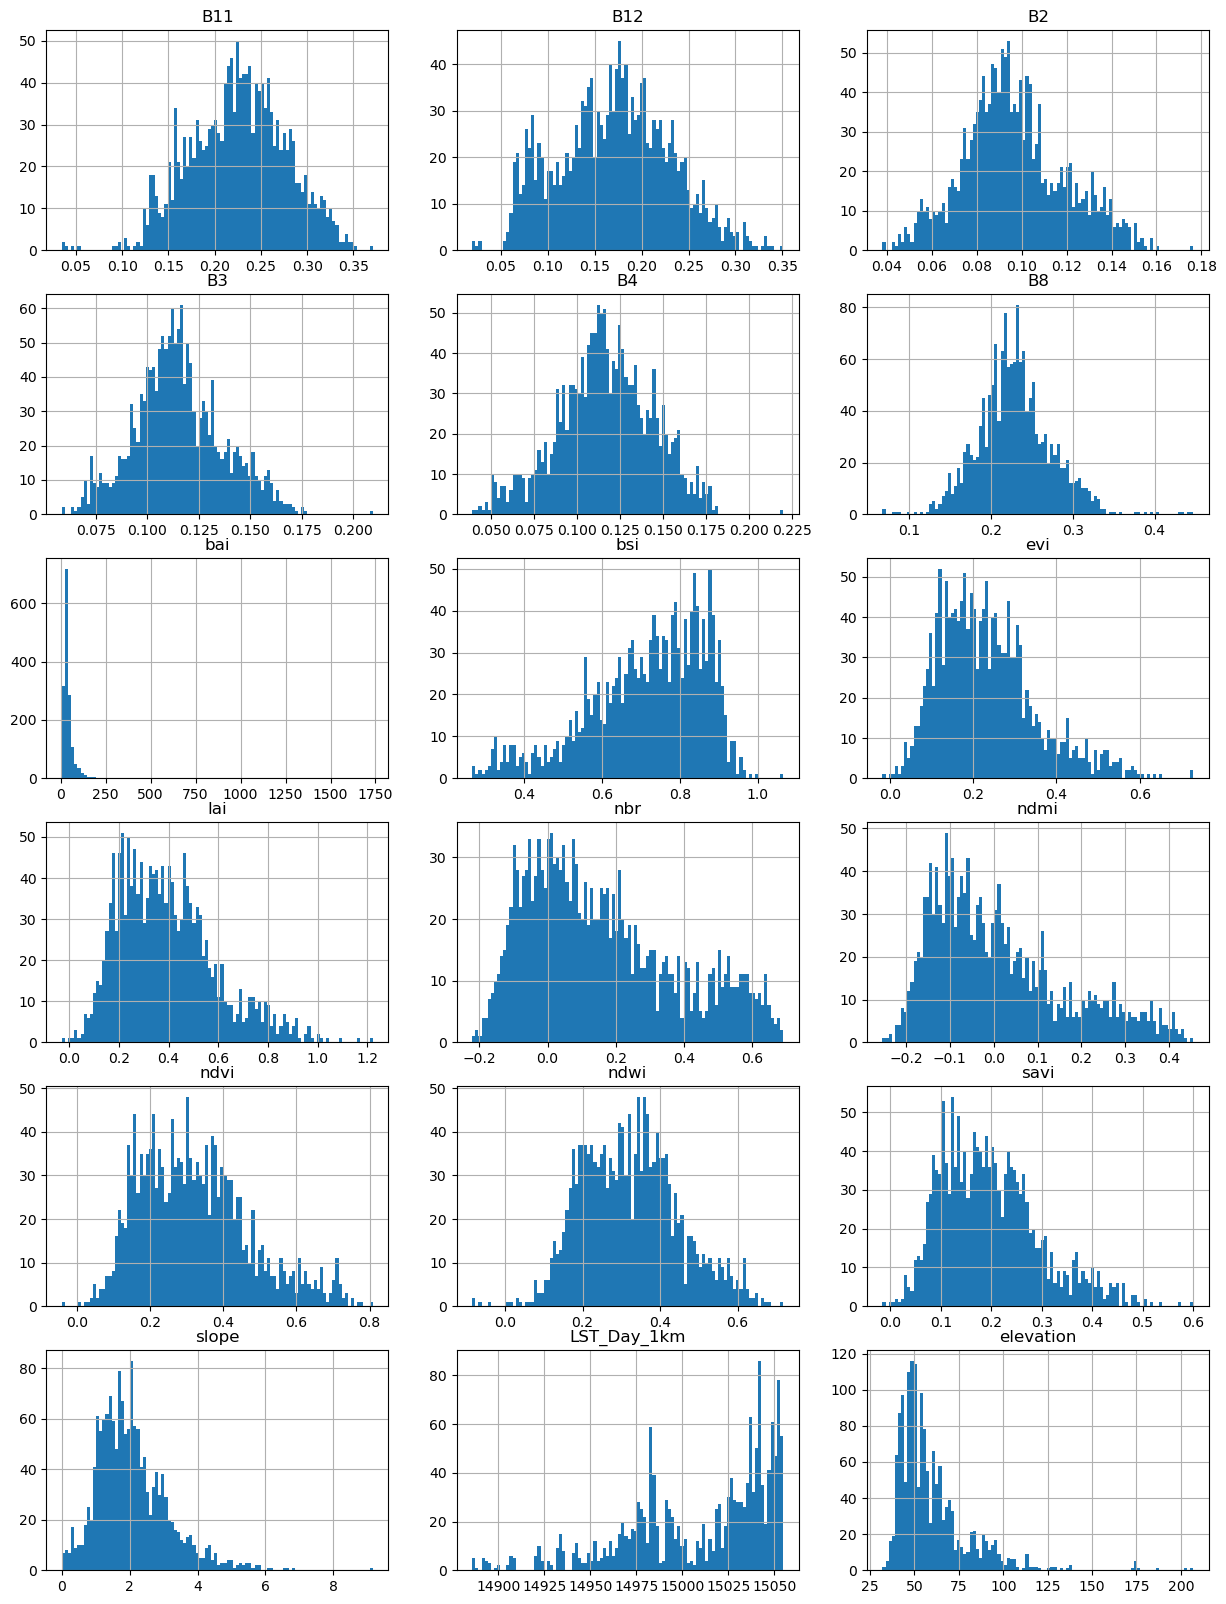

In [40]:
# distribution of all the independent variables - multi chart
fig, axes = plt.subplots(6, 3, figsize=(15, 20))
axes = axes.flatten()
for i, col in enumerate(independent_vars):
    df[col].hist(bins=100, ax=axes[i])
    axes[i].set_title(col)
plt.show()

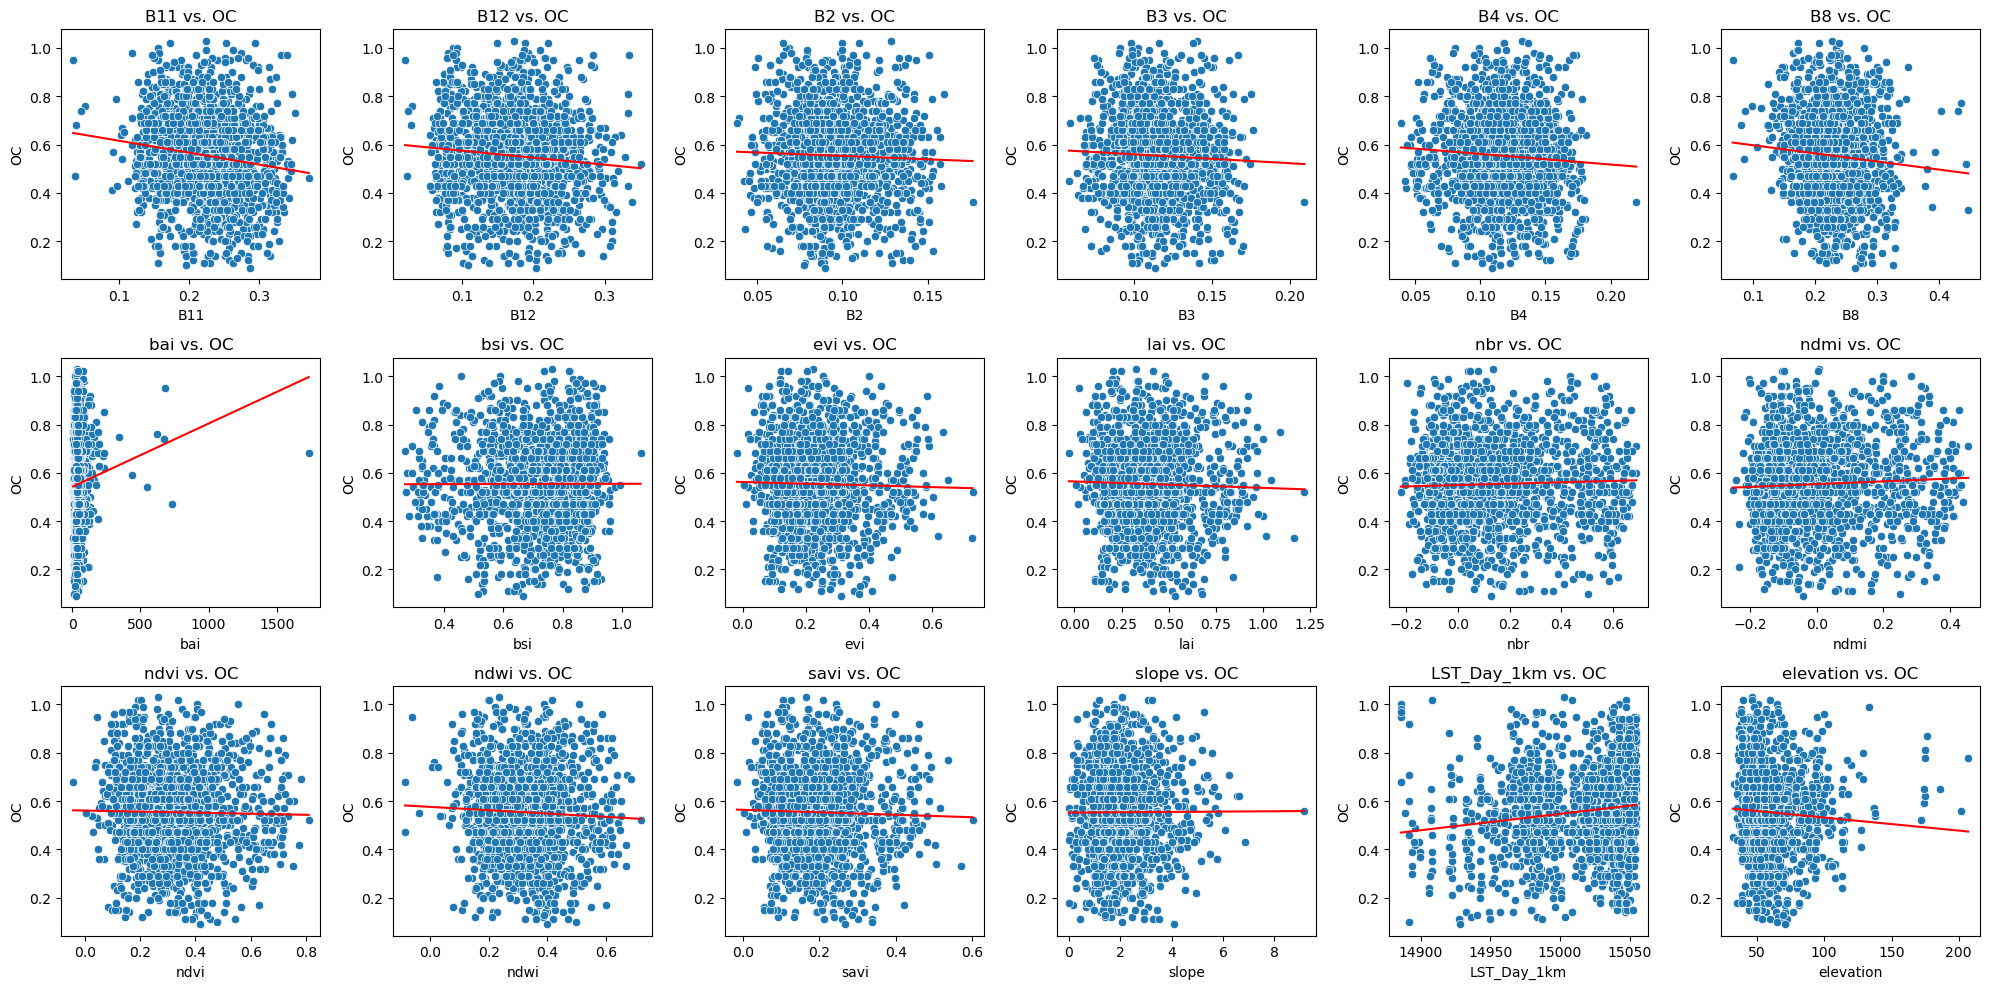

In [39]:

# Create a figure with subplots for each independent variable
fig, axs = plt.subplots(nrows=3, ncols=6, figsize=(20, 10))

# Loop through each independent variable and plot a scatter plot with fit line
for i, var in enumerate(independent_vars):
    # Calculate the row and column indices for the current subplot
    row = i // 6
    col = i % 6
    
    # Plot the scatter plot
    sns.scatterplot(x=var, y=dependent_var, data=df, ax=axs[row, col])
    axs[row, col].set_title(var + " vs. " + dependent_var)
    
    # Calculate the slope and intercept of the fit line
    slope, intercept, r_value, p_value, std_err = linregress(df[var], df[dependent_var])
    
    # Create a range of x values for the fit line
    x_range = np.linspace(df[var].min(), df[var].max(), 100)
    
    # Calculate the y values for the fit line
    y_range = slope * x_range + intercept
    
    # Plot the fit line
    axs[row, col].plot(x_range, y_range, color="red")
    
plt.tight_layout()
plt.show()

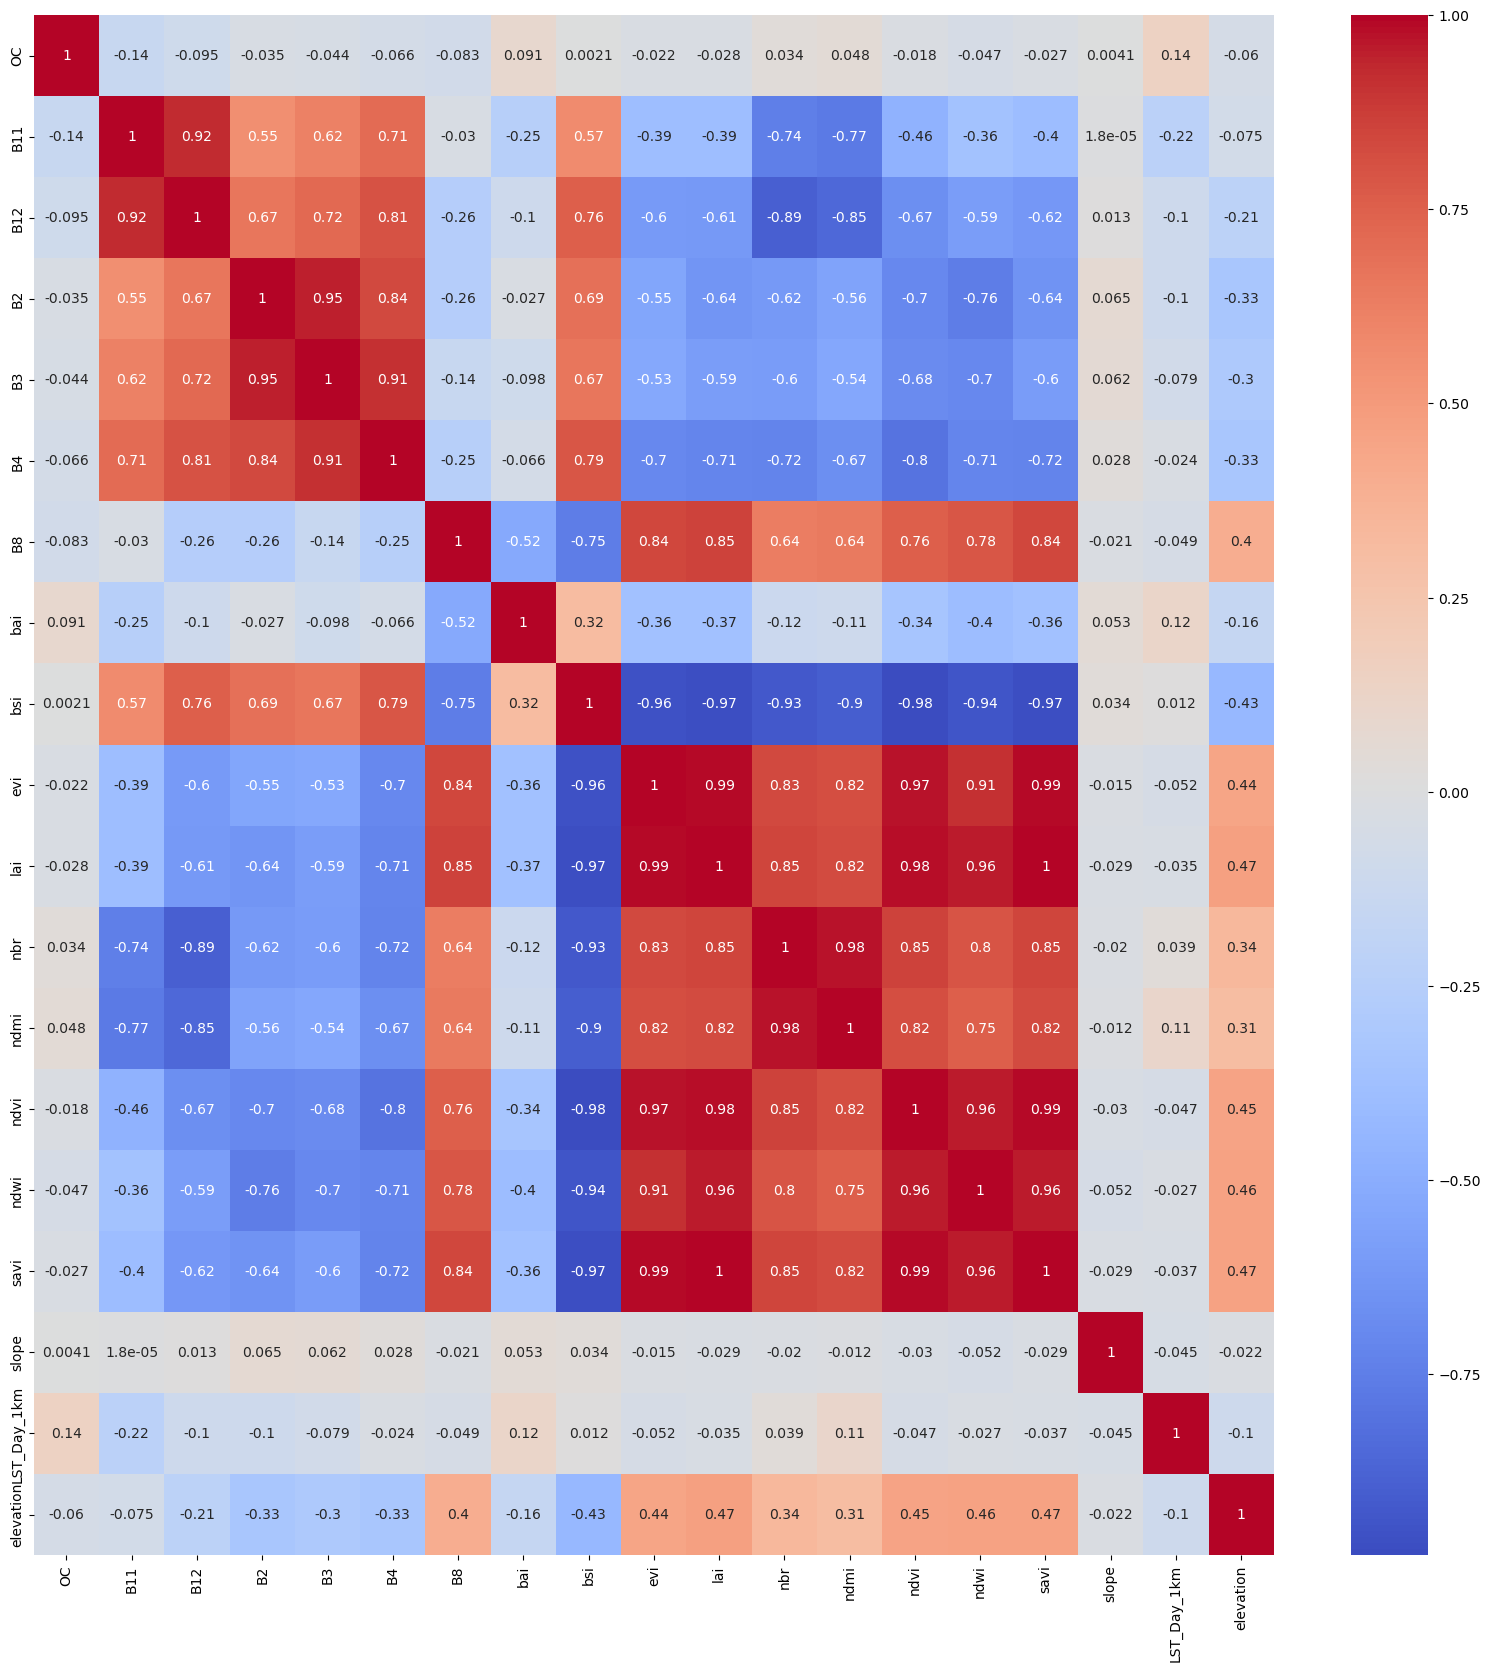

In [49]:
# correlation matrix
corr_matrix = df.corr()
corr_matrix .style.background_gradient(cmap='coolwarm')

#plot correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix , annot=True, cmap="coolwarm")
plt.show()


# remove highly correlated variables


In [54]:
# remove highly correlated variables
# Select upper triangle of correlation matrix


upper = corr_matrix.where((np.triu(np.ones(corr_matrix.shape), k=1) + np.tril(np.ones(corr_matrix.shape), k=-1)).astype(bool))

# # Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

print("Features to drop:", to_drop)

# # Drop features 
df.drop(to_drop, axis=1, inplace=True)

Features to drop: ['B2', 'B3', 'evi', 'lai', 'nbr', 'ndmi', 'ndvi', 'ndwi', 'savi']


In [56]:
# save the data

df.to_csv("../data/soilify_bihar_training_cleaned.csv", index=False)